# Phonon mode analysis in theta-space
The dataset generated by `twist_ph.py` in theta-space mode is a matrix of phonon modes at a certain k-point over a sampled set of twist angles. This notebook shows a visualization of these modes for each k-point.

In [1]:
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import MultipleLocator
from itertools import product as prod
from __class_PhononConfig import TwistedRealspacePhonon
from pymatgen.io.vasp.inputs import Poscar
%matplotlib inline

## MoS2-0 with 9x9

In [6]:
ROOT = '/Users/jonathanlu/Documents'
DIRNAME = "tvMoS2"
THSPC_DIR = "theta"

# Change as necessary
M1_th_min, M1_th_max, M1_ntheta = np.loadtxt(f"{ROOT}/{DIRNAME}/theta.txt")
M1_ntheta = int(M1_ntheta)
KPT = 'Gamma'
print(f"{M1_ntheta} angles from {M1_th_min} to {M1_th_max}")

# Import dataset from the directory
log_name = r'$\Gamma$' if KPT == 'Gamma' else KPT
path = f'{ROOT}/{DIRNAME}/{THSPC_DIR}/{KPT}/thspc_modes.npy'
poscars_uc = [Poscar.from_file(f'{ROOT}/{DIRNAME}/POSCAR_LAYER{i+1}') for i in range(2)]
M1_dataset = np.load(path)
M1_nmodes = M1_dataset.shape[1]
print("Dataset shape:", M1_dataset.shape)
print("Number of modes:", M1_nmodes)
M1_thetas = np.linspace(M1_th_min, M1_th_max, M1_ntheta)

101 angles from 0.01 to 10.0
Dataset shape: (101, 31)
Number of modes: 31


In [7]:
# Find indices of key modes, manually
M1_LB1_idxs = np.zeros(M1_ntheta).astype(int)
M1_LB1_idxs[73:] = 5
M1_LB1_idxs[25:73] = 11
M1_LB1_idxs[10:25] = 17
M1_LB1_idxs[5:10] = 23
M1_LB1_idxs[:5] = 25

M1_LB2_idxs = np.zeros(M1_ntheta).astype(int)
M1_LB2_idxs[73:] = 23
M1_LB2_idxs[25:73] = 29

M1_S_idxs = np.zeros(M1_ntheta).astype(int)
M1_S_idxs[77:] = 4
M1_S_idxs[10:77] = 1
M1_S_idxs[7:10] = 16
M1_S_idxs[:7] = 21
np.save(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/MoS2_LB1_idxs.npy', M1_LB1_idxs)
np.save(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/MoS2_S_idxs.npy', M1_S_idxs)

# Extract the mode list from the indices
M1_LB1_modes = np.zeros(M1_ntheta)
M1_S_modes = np.zeros(M1_ntheta)

for i in range(M1_ntheta):
    M1_LB1_modes[i] = M1_dataset[i, M1_LB1_idxs[i]]
    M1_S_modes[i] = M1_dataset[i, M1_S_idxs[i]]
np.save(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/MoS2_LB1_modes.npy', M1_LB1_modes)
np.save(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/MoS2_S_modes.npy', M1_S_modes)

## MoS2-0 with 12x12

In [8]:
M2_dataset = np.load("/Users/jonathanlu/Desktop/thspc_modes.npy")

# Extract the mode list from the indices
M2_LB1_modes = np.zeros(M1_ntheta)
M2_S_modes = np.zeros(M1_ntheta)

for i in range(M1_ntheta):
    M2_LB1_modes[i] = M1_dataset[i, M1_LB1_idxs[i]]
    M2_S_modes[i] = M1_dataset[i, M1_S_idxs[i]]

In [10]:
def gradient_image(i, ax, extent, cmap_range=(0, 1), **kwargs):
    # REGIME = int([1.0 + (7.6-1.0)/2, 0.5 + (4.2-0.5)/2, 1.0 + (5.5-1.0)/2][i]*10)
    REGIME1 = int([1.0, 1.0, 1.0][i]*10)
    REGIME2 = int([7.6, 4.2, 5.5][i]*10)
    r2s = np.linspace(COLORS[0], COLORS[1], REGIME1, endpoint=False)
    s2d = np.linspace(COLORS[1], COLORS[2], 101-REGIME2, endpoint=True)
    my_map = ListedColormap(np.vstack((r2s, np.repeat([COLORS[1]], 101-REGIME1-REGIME2, axis=0), s2d)))
    phi = np.pi / 2
    v = np.array([np.cos(phi), np.sin(phi)])
    X = np.array([[v @ [1, 0], v @ [1, 1]],
                  [v @ [0, 0], v @ [0, 1]]])
    a, b = cmap_range
    X = a + (b - a) / X.max() * X
    im = ax.imshow(X, extent=extent, interpolation='bicubic',
                   vmin=0, vmax=1, aspect='auto', cmap=my_map, alpha=0.6, **kwargs)
    return im

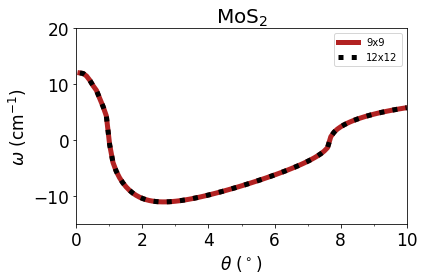

In [30]:
fig, ax = plt.subplots()
LB1_modes = [M1_LB1_modes, M2_LB1_modes]
S_modes = [M1_S_modes, M2_S_modes]
xmin, xmax = xlim = 0, 10
ymin, ymax = ylim = -15, 20
FONT_SIZE = 17

ax.plot(M1_thetas[1:], S_modes[0][1:], c='firebrick', label='9x9', linewidth=5)
ax.plot(M1_thetas[1:], S_modes[1][1:], c='k', label='12x12', linestyle=':', linewidth=5)
ax.xaxis.set_major_locator(MultipleLocator(2))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.tick_params(axis='both', labelsize=FONT_SIZE)
ax.set_xlabel(r'$\theta$ ($^\circ$)', fontsize=FONT_SIZE)
ax.set(xlim=xlim, ylim=ylim, autoscale_on=False)
ax.set_ylabel(r'$\omega$ (cm$^{-1}$)', fontsize=FONT_SIZE)
plt.legend()
plt.title(r"MoS$_2$", fontsize=20)

plt.tight_layout()
plt.savefig('/Users/jonathanlu/Desktop/nodiff.pdf')